<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine-Learning/boston_house.csv'

In [ ]:
df = pd.read_csv(path)
data = df.drop('Target',axis=1)
label = df['Target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
ridge = Ridge()
ns = cross_val_score(ridge,data,label,scoring='neg_mean_squared_error',cv=5)
rmse = np.sqrt(-1*ns)
rmse.mean()

5.6525709656135446

In [ ]:
ridge = Ridge(alpha=10)
ns = cross_val_score(ridge,data,label,scoring='neg_mean_squared_error',cv=5)
rmse = np.sqrt(-1*ns)
rmse.mean()

5.518166280868967

In [ ]:
alphas = [0.0001,0.01,0.1,1,2,5,10]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    print(f'{alpha:7.4f} : {ridge.score(x_test,y_test)}')

 0.0001 : 0.6119210915767934
 0.0100 : 0.6117886968773643
 0.1000 : 0.6106704265580589
 1.0000 : 0.6045719158899983
 2.0000 : 0.6023832280200928
 5.0000 : 0.6023620590760352
10.0000 : 0.6058990530674466


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'alpha' : [0.0001,0.01,0.1,1,2,5,10]
}

In [ ]:
ridge = Ridge()
gs = GridSearchCV(ridge,param_grid=params,scoring='r2')
gs.fit(x_train,y_train)
print(gs.best_params_)

{'alpha': 0.1}


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
ridge.score(x_test,y_test)

0.6106704265580589

In [ ]:
model = gs.best_estimator_
pred = model.predict(x_test)
model.score(x_test,y_test)

0.6106704265580589

In [ ]:
alphas = [0.0001,0.01,0.1,1,2,5,10]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    sc = cross_val_score(ridge,x_train,y_train,cv=5)
    print(f'{alpha:7.4f}', np.mean(sc))

 0.0001 0.7494452708203426
 0.0100 0.7494585126208188
 0.1000 0.7495115228782773
 1.0000 0.748395474399264
 2.0000 0.747405104397415
 5.0000 0.7461067258039479
10.0000 0.7446877112421917


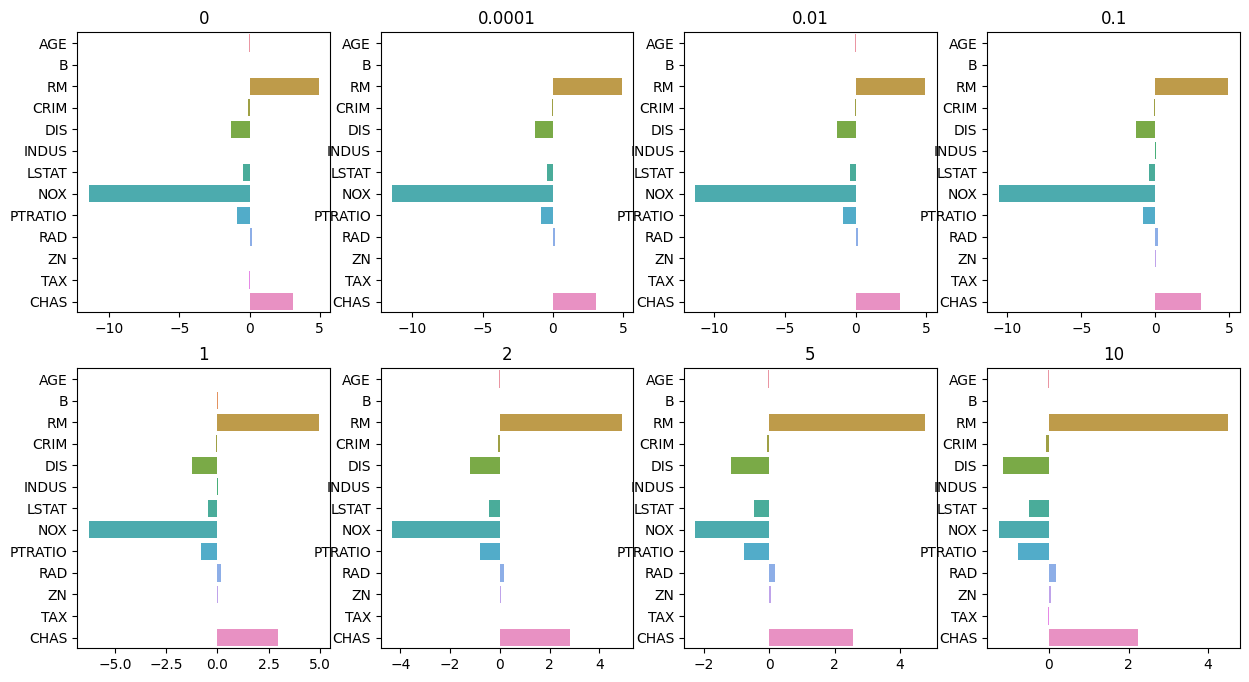

In [ ]:
import seaborn as sns
alphas = [0,0.0001,0.01,0.1,1,2,5,10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for i,alpha in enumerate(alphas):
  nr = int(i/4)
  nc = i%4
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  cs = pd.Series(ridge.coef_,index=data.columns)
  rdf[str(alpha)] = cs
  sns.barplot(x=cs.values,y=cs.index,ax=axs[nr][nc])
  axs[nr][nc].set_title(str(alpha))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(data)
sd = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(sd,label)

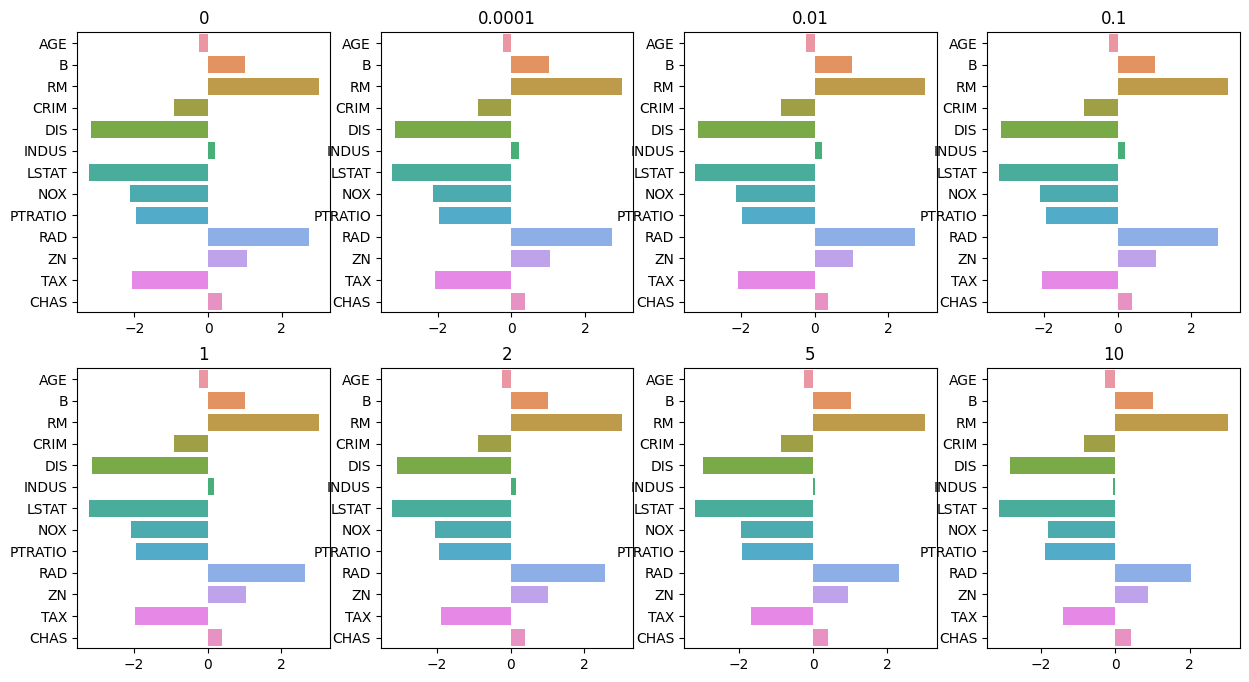

In [ ]:
alphas = [0,0.0001,0.01,0.1,1,2,5,10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for i,alpha in enumerate(alphas):
  nr = int(i/4)
  nc = i%4
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  cs = pd.Series(ridge.coef_,index=data.columns)
  rdf[str(alpha)] = cs
  sns.barplot(x=cs.values,y=cs.index,ax=axs[nr][nc])
  axs[nr][nc].set_title(str(alpha))
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

In [ ]:
alphas = [0.0001,0.01,0.1,1,2,5,10]

print("\n===========Ridge============")
for alpha in alphas:
    model = Ridge(alpha=alpha)
    sc = cross_val_score(model,x_train,y_train,cv=5)
    print(f'{alpha:7.4f}',np.mean(sc))

print("\n===========Lasso============")
for alpha in alphas:
    model = Lasso(alpha=alpha)
    sc = cross_val_score(model,x_train,y_train,cv=5)
    print(f'{alpha:7.4f}',np.mean(sc))

print("\n=========ElasticNet==========")
for alpha in alphas:
    model = ElasticNet(alpha=alpha)
    sc = cross_val_score(model,x_train,y_train,cv=5)
    print(f'{alpha:7.4f}',np.mean(sc))


===========Ridge============
 0.0001 0.7018511682808923
 0.0100 0.7018571070012104
 0.1000 0.7019105074908703
 1.0000 0.7023903417590953
 2.0000 0.7028230758033821
 5.0000 0.703657935111972
10.0000 0.7041030685752382

===========Lasso============
 0.0001 0.701859126923926
 0.0100 0.7024563198895536
 0.1000 0.6993781398932382
 1.0000 0.6394646965918707
 2.0000 0.5748597349031964
 5.0000 0.23622064992554156
10.0000 -0.005868784757900247

=========ElasticNet==========
 0.0001 0.7018641782134779
 0.0100 0.7028537523517885
 0.1000 0.7009986149982662
 1.0000 0.6238913168229165
 2.0000 0.5455203167166344
 5.0000 0.3038977639633524
10.0000 0.058128190825813844


In [ ]:
alphas = [0.0001,0.01,0.1,1,2,5,10]

print("\n===========Ridge============")
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    print(f'{alpha:7.4f}',model.coef_)

print("\n===========Lasso============")
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    print(f'{alpha:7.4f}',model.coef_)

print("\n=========ElasticNet==========")
for alpha in alphas:
    model = ElasticNet(alpha=alpha)
    model.fit(x_train,y_train)
    print(f'{alpha:7.4f}',model.coef_)


===========Ridge============
 0.0001 [-0.23824318  1.01382925  3.00554356 -0.91728761 -3.16814186  0.19956511
 -3.23566669 -2.12283164 -1.96345094  2.73875037  1.05273655 -2.07453679
  0.37248972]
 0.0100 [-0.2382858   1.01382599  3.0056063  -0.91718193 -3.16774032  0.19920894
 -3.23554706 -2.12244986 -1.96336309  2.73778485  1.05250522 -2.07358044
  0.3725534 ]
 0.1000 [-0.23867159  1.01379608  3.00617359 -0.91622415 -3.16409527  0.19598563
 -3.23446109 -2.1189868  -1.96256598  2.72904183  1.05040891 -2.06492498
  0.37313001]
 1.0000 [-0.24236764  1.01346938  3.01155152 -0.90692887 -3.12816067  0.16514086
 -3.22374607 -2.08509632 -1.95474942  2.64489065  1.03008017 -1.98203836
  0.37868049]
 2.0000 [-0.24615466  1.01304892  3.01693638 -0.8971637  -3.08929879  0.13359573
 -3.21213122 -2.04894021 -1.94637326  2.5578516   1.00875658 -1.89715197
  0.38442317]
 5.0000 [-0.25582585  1.01144849  3.02986836 -0.87090904 -2.97894878  0.05318206
 -3.17888866 -1.94889458 -1.92292683  2.33072355 